# Finite Element Analysis [ME335A]

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

### Problem 1 - 5

In [ ]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
def my_func(x, order):
  return np.sin(order * x)

In [ ]:
def lagrange_basis(x, k, a=1):
    numerator = 1
    denominator = 1
    nodes = np.linspace(0.0, 1.0, k+1)

    for b in range(1, k+2):
        if b != a:
            numerator *= (x - nodes[b-1])
            denominator *= (nodes[a-1] - nodes[b-1])

    return numerator / denominator

In [ ]:
# Set up the space
xa, xb = 0.0, 1.0
x = np.linspace(xa, xb, 100)
k = 3

y = lagrange_basis(x, k, a=2)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

In [ ]:
# For element 1
k = 3
order = 12
n_grids = 100

dots = [0.0, 1.0, 2.0, 3.0]
xs, zs = [], []

for j in range(3):
  xa, xb = dots[j], dots[j+1]
  xe = np.linspace(xa, xb, k+1)
  x = np.linspace(xa, xb, n_grids)

  z = np.zeros(n_grids)
  for a in range(1, k+2):
    f = my_func(xe[a-1], order)
    N = lagrange_basis(x-xa, k, a)
    z = z + f * N

  xs.append(x)
  zs.append(z)

xf = np.concatenate(xs, axis=0)
zf = np.concatenate(zs, axis=0)
yf = my_func(xf, order)

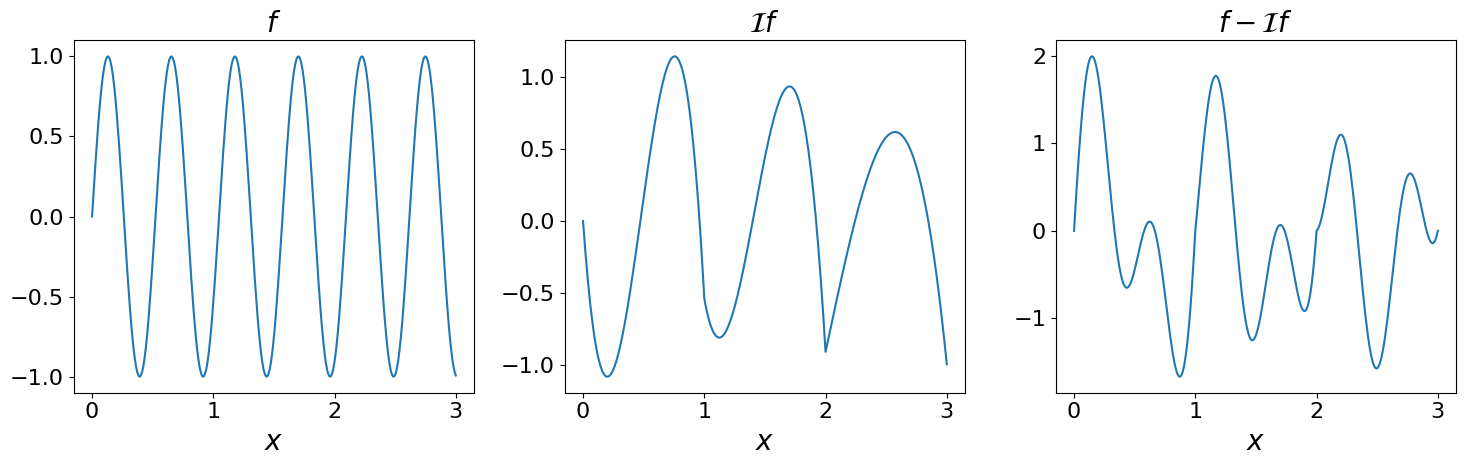

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot x vs y
ax1.plot(xf, yf)
ax1.set_title(r'$f$')
ax1.set_xlabel(r'$x$')

# Plot x vs z
ax2.plot(xf, zf)
ax2.set_title(r'$\mathcal{I}f$')
ax2.set_xlabel(r'$x$')

# Plot x vs y-z
ax3.plot(xf, yf - zf)
ax3.set_title(r'$f - \mathcal{I}f$')
ax3.set_xlabel(r'$x$')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
def lagrange_basis(x, k, a):
  numerator = 1
  denominator = 1
  nodes = np.linspace(0.0, 1.0, k+1)

  for b in range(1, k+2):
      if b != a:
          numerator *= (x - nodes[b-1])
          denominator *= (nodes[a-1] - nodes[b-1])

  return numerator / denominator

In [ ]:
def lagrange_basis_sympy(x, k, a):
    x_sym = sp.Symbol('x')

    nodes = np.linspace(0.0, 1.0, k+1)

    numerator = 1
    denominator = 1

    for b in range(k+1):
        if b != a-1:
            numerator *= (x_sym - nodes[b])
            denominator *= (nodes[a-1] - nodes[b])

    basis_function = numerator / denominator
    # basis_lambda = sp.lambdify(x_sym, basis_function, 'numpy')

    return basis_function #basis_lambda(x)

In [ ]:
def lagrange_basis_sympy_der(x, k, a):
    x_sym = sp.Symbol('x')

    nodes = np.linspace(0.0, 1.0, k+1)

    numerator = 1
    denominator = 1

    for b in range(k+1):
        if b != a-1:
            numerator *= (x_sym - nodes[b])
            denominator *= (nodes[a-1] - nodes[b])

    basis_function = numerator / denominator
    derivative_function = sp.diff(basis_function, x_sym)
    # derivative_lambda = sp.lambdify(x_sym, derivative_function, 'numpy')

    return derivative_function #derivative_lambda(x)

In [ ]:
def lagrange_basis_sympy_scaled(x, xa, xb, k, a):
  xn = (x - xa) / (xb - xa)
  y = lagrange_basis_sympy(xn, k, a)

  return y

In [ ]:
def lagrange_basis_sympy_der_scaled(x, xa, xb, k, a):
  xn = (x - xa) / (xb - xa)
  y = lagrange_basis_sympy_der(xn, k, a)

  return y

In [ ]:
def bilinear_sympy(i, j, eps, c, xa, xb, k):
  x = sp.Symbol('x')

  u = lagrange_basis_sympy_scaled(x, xa, xb, k, i)
  v = lagrange_basis_sympy_scaled(x, xa, xb, k, j)
  up = lagrange_basis_sympy_der_scaled(x, xa, xb, k, i)
  vp = lagrange_basis_sympy_der_scaled(x, xa, xb, k, j)

  integrand = eps * up * vp + c * up * v
  result = sp.integrate(integrand, (x, xa, xb))

  return result

In [ ]:
def linear_sympy(i, xa, xb, k):
  x = sp.Symbol('x')
  f = x  # f(x) = x

  v = lagrange_basis_sympy_scaled(x, xa, xb, k, i)

  integrand = f * v

  result = sp.integrate(integrand, (x, xa, xb))

  return result

In [ ]:
# Setting
# def func_f(x): return x
nel = 3
k = 2
h = -20
eps = 1
c = 1
g = 2

In [ ]:
# Local to global map
LG = np.array([[1, 2, 3], [5, 6, 7], [2, 3, 4]])
print(LG)

[[1 2 3]
 [5 6 7]
 [2 3 4]]


In [ ]:
# Element 1
xa1, xb1 = 1.0, 2.0
K1 = np.zeros((k + 1, k + 1)); F1 = np.zeros(k + 1)

for i in range(1, k + 2):
  F1[i-1] = linear_sympy(i, xa1, xb1, k)
  for j in range(1, k + 2):
    K1[i-1, j-1] = bilinear_sympy(j, i, eps, c, xa1, xb1, k)

print("K1 Matrix:")
headers = [f"j={j+1}" for j in range(k+1)]
table = [[f"i={i+1}"] + list(row) for i, row in enumerate(K1)]
print(tabulate(table, headers=headers, floatfmt=".6f"))

print("\nF1 Vector:")
f2_table = [[f"i={i+1}", f"{val:.6f}"] for i, val in enumerate(F1)]
print(tabulate(f2_table, headers=["Index", "Value"], floatfmt=".6f"))

K1 Matrix:
            j=1         j=2         j=3
---  ----------  ----------  ----------
i=1   14.833333  -38.000000   23.166667
i=2  -39.333333  101.333333  -62.000000
i=3   27.500000  -71.333333   43.833333

F1 Vector:
Index        Value
-------  ---------
i=1       2.000000
i=2      -5.666667
i=3       5.166667


In [ ]:
# Element 2
xa2, xb2 = 2.0, 4.0
K2 = np.zeros((k + 1, k + 1)); F2 = np.zeros(k + 1)

for i in range(1, k + 2):
  F2[i-1] = linear_sympy(i, xa2, xb2, k)
  for j in range(1, k + 2):
    K2[i-1, j-1] = bilinear_sympy(j, i, eps, c, xa2, xb2, k)

print("K2 Matrix:")
headers = [f"j={j+1}" for j in range(k+1)]
table = [[f"i={i+1}"] + list(row) for i, row in enumerate(K2)]
print(tabulate(table, headers=headers, floatfmt=".6f"))

print("\nF2 Vector:")
f2_table = [[f"i={i+1}", f"{val:.6f}"] for i, val in enumerate(F2)]
print(tabulate(f2_table, headers=["Index", "Value"], floatfmt=".6f"))

K2 Matrix:
             j=1           j=2           j=3
---  -----------  ------------  ------------
i=1   388.666667   -856.000000    467.333333
i=2  -890.666667   1962.666667  -1072.000000
i=3   520.000000  -1146.666667    626.666667

F2 Vector:
Index          Value
-------  -----------
i=1        70.000000
i=2      -165.333333
i=3       101.333333


In [ ]:
# Element 3
xa3, xb3 = 4.0, 7.0
K3 = np.zeros((k + 1, k + 1)); F3 = np.zeros(k + 1)

for i in range(1, k + 2):
  F3[i-1] = linear_sympy(i, xa3, xb3, k)
  for j in range(1, k + 2):
    K3[i-1, j-1] = bilinear_sympy(j, i, eps, c, xa3, xb3, k)

F3[-1] -= (h * 1.0)

print("K3 Matrix:")
headers = [f"j={j+1}" for j in range(k+1)]
table = [[f"i={i+1}"] + list(row) for i, row in enumerate(K3)]
print(tabulate(table, headers=headers, floatfmt=".6f"))

print("\nF3 Vector:")
f2_table = [[f"i={i+1}", f"{val:.6f}"] for i, val in enumerate(F3)]
print(tabulate(f2_table, headers=["Index", "Value"], floatfmt=".6f"))

K3 Matrix:
              j=1           j=2           j=3
---  ------------  ------------  ------------
i=1   3940.500000  -8274.000000   4333.500000
i=2  -8526.000000  17904.000000  -9378.000000
i=3   4642.500000  -9750.000000   5107.500000

F3 Vector:
Index           Value
-------  ------------
i=1        810.000000
i=2      -1773.000000
i=3        999.500000


In [ ]:
# Assembly
Ks = [K1, K2, K3]
Fs = [F1, F2, F3]
K = np.zeros((7, 7)); F = np.zeros(7)

# Active
for e in range(1, nel+1):
  for a in range(1, k+2):
    F[LG[e-1, a-1]-1] += Fs[e-1][a-1]
    for b in range(1, k+2):
      K[LG[e-1, a-1]-1, LG[e-1, b-1]-1] += Ks[e-1][a-1, b-1]

# Constaint
K[0, :] = 0.0; K[0, 0] = 1.0; F[0] = 1.0

print("Global Stiffness Matrix:")
headers = [f"j={j+1}" for j in range(7)]
table = [[f"i={i+1}"] + list(row) for i, row in enumerate(K)]
print(tabulate(table, headers=headers, floatfmt=".6f"))

print("\nGlobal Load Vector:")
f2_table = [[f"i={i+1}", f"{val:.6f}"] for i, val in enumerate(F)]
print(tabulate(f2_table, headers=["Index", "Value"], floatfmt=".6f"))

Global Stiffness Matrix:
            j=1           j=2           j=3           j=4          j=5           j=6           j=7
---  ----------  ------------  ------------  ------------  -----------  ------------  ------------
i=1    1.000000      0.000000      0.000000      0.000000     0.000000      0.000000      0.000000
i=2  -39.333333   4041.833333  -8336.000000   4333.500000     0.000000      0.000000      0.000000
i=3   27.500000  -8597.333333  17947.833333  -9378.000000     0.000000      0.000000      0.000000
i=4    0.000000   4642.500000  -9750.000000   5107.500000     0.000000      0.000000      0.000000
i=5    0.000000      0.000000      0.000000      0.000000   388.666667   -856.000000    467.333333
i=6    0.000000      0.000000      0.000000      0.000000  -890.666667   1962.666667  -1072.000000
i=7    0.000000      0.000000      0.000000      0.000000   520.000000  -1146.666667    626.666667

Global Load Vector:
Index           Value
-------  ------------
i=1          1.0000

In [ ]:
u = np.linalg.inv(K) @ F

for e in range(1, nel+1):
  for a in range(1, k+2):
    LG[a-1, e-1]
    lagrange_basis_sympy_scaled(x, xa1, xb1, k, i=a)


[1.00000000e+00 4.89816639e+01 7.93749738e+01 1.07196891e+02
 5.62949953e+12 5.62949953e+12 5.62949953e+12]


### Problem 2 - 7

In [ ]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
def lagrange_basis_sympy(x, xa, xb, k, a):
    x_sym = sp.Symbol('x')

    nodes = np.linspace(xa, xb, k+1)

    numerator = 1
    denominator = 1

    for b in range(k+1):
        if b != a-1:
            numerator *= (x_sym - nodes[b])
            denominator *= (nodes[a-1] - nodes[b])

    basis_function = numerator / denominator

    return basis_function

In [ ]:
k = 2  # P2 elements
nel = 3
h = -20
eps = 1
c = 1
g = 2

In [ ]:
N11 = sp.Piecewise((lagrange_basis_sympy(x, 1.0, 2.0, k, 1), sp.And(1.0 <= x, x <= 2.0)), (0, True))
N21 = sp.Piecewise((lagrange_basis_sympy(x, 1.0, 2.0, k, 2), sp.And(1.0 <= x, x <= 2.0)), (0, True))
N31 = sp.Piecewise((lagrange_basis_sympy(x, 1.0, 2.0, k, 3), sp.And(1.0 <= x, x <= 2.0)), (0, True))

N12 = sp.Piecewise((lagrange_basis_sympy(x, 2.0, 4.0, k, 1), sp.And(2.0 <= x, x <= 4.0)), (0, True))
N22 = sp.Piecewise((lagrange_basis_sympy(x, 2.0, 4.0, k, 2), sp.And(2.0 <= x, x <= 4.0)), (0, True))
N32 = sp.Piecewise((lagrange_basis_sympy(x, 2.0, 4.0, k, 3), sp.And(2.0 <= x, x <= 4.0)), (0, True))

N13 = sp.Piecewise((lagrange_basis_sympy(x, 4.0, 7.0, k, 1), sp.And(4.0 <= x, x <= 7.0)), (0, True))
N23 = sp.Piecewise((lagrange_basis_sympy(x, 4.0, 7.0, k, 2), sp.And(4.0 <= x, x <= 7.0)), (0, True))
N33 = sp.Piecewise((lagrange_basis_sympy(x, 4.0, 7.0, k, 3), sp.And(4.0 <= x, x <= 7.0)), (0, True))

Ns = [[N11, N21, N31], [N12, N22, N32], [N13, N23, N33]]

In [ ]:
dN11 = sp.diff(N11, x)
dN21 = sp.diff(N21, x)
dN31 = sp.diff(N31, x)

dN12 = sp.diff(N12, x)
dN22 = sp.diff(N22, x)
dN32 = sp.diff(N32, x)

dN13 = sp.diff(N13, x)
dN23 = sp.diff(N23, x)
dN33 = sp.diff(N33, x)

dNs = [[dN11, dN21, dN31], [dN12, dN22, dN32], [dN13, dN23, dN33]]

In [ ]:
# Element 1
K1_11 = sp.integrate(eps * dN11 * dN11 + c * dN11 * N11, (x, 1.0, 2.0))
K1_12 = sp.integrate(eps * dN21 * dN11 + c * dN21 * N11, (x, 1.0, 2.0))
K1_13 = sp.integrate(eps * dN31 * dN11 + c * dN31 * N11, (x, 1.0, 2.0))
K1_21 = sp.integrate(eps * dN11 * dN21 + c * dN11 * N21, (x, 1.0, 2.0))
K1_22 = sp.integrate(eps * dN21 * dN21 + c * dN21 * N21, (x, 1.0, 2.0))
K1_23 = sp.integrate(eps * dN31 * dN21 + c * dN31 * N21, (x, 1.0, 2.0))
K1_31 = sp.integrate(eps * dN11 * dN31 + c * dN11 * N31, (x, 1.0, 2.0))
K1_32 = sp.integrate(eps * dN21 * dN31 + c * dN21 * N31, (x, 1.0, 2.0))
K1_33 = sp.integrate(eps * dN31 * dN31 + c * dN31 * N31, (x, 1.0, 2.0))

F1_1 = sp.integrate(x * N11, (x, 1.0, 2.0))
F1_2 = sp.integrate(x * N21, (x, 1.0, 2.0))
F1_3 = sp.integrate(x * N31, (x, 1.0, 2.0))

K1 = np.array([[K1_11, K1_12, K1_13], [K1_21, K1_22, K1_23], [K1_31, K1_32, K1_33]])
F1 = np.array([F1_1, F1_2, F1_3])

print(K1, F1)

[[1.83333333333334 -2.00000000000000 0.166666666666669]
 [-3.33333333333334 5.33333333333333 -2.00000000000000]
 [0.500000000000000 -3.33333333333334 2.83333333333334]] [0.166666666666666 1.00000000000000 0.333333333333333]


In [ ]:
# Element 2
K2_11 = sp.integrate(eps * dN12 * dN12 + c * dN12 * N12, (x, 2.0, 4.0))
K2_12 = sp.integrate(eps * dN22 * dN12 + c * dN22 * N12, (x, 2.0, 4.0))
K2_13 = sp.integrate(eps * dN32 * dN12 + c * dN32 * N12, (x, 2.0, 4.0))
K2_21 = sp.integrate(eps * dN12 * dN22 + c * dN12 * N22, (x, 2.0, 4.0))
K2_22 = sp.integrate(eps * dN22 * dN22 + c * dN22 * N22, (x, 2.0, 4.0))
K2_23 = sp.integrate(eps * dN32 * dN22 + c * dN32 * N22, (x, 2.0, 4.0))
K2_31 = sp.integrate(eps * dN12 * dN32 + c * dN12 * N32, (x, 2.0, 4.0))
K2_32 = sp.integrate(eps * dN22 * dN32 + c * dN22 * N32, (x, 2.0, 4.0))
K2_33 = sp.integrate(eps * dN32 * dN32 + c * dN32 * N32, (x, 2.0, 4.0))

F2_1 = sp.integrate(x * N12, (x, 2.0, 4.0))
F2_2 = sp.integrate(x * N22, (x, 2.0, 4.0))
F2_3 = sp.integrate(x * N32, (x, 2.0, 4.0))

K2 = np.array([[K2_11, K2_12, K2_13], [K2_21, K2_22, K2_23], [K2_31, K2_32, K2_33]])
F2 = np.array([F2_1, F2_2, F2_3])

print(K2, F2)

[[0.666666666666663 -0.666666666666671 0]
 [-2.00000000000000 2.66666666666665 -0.666666666666675]
 [0.333333333333337 -2.00000000000000 1.66666666666667]] [0.666666666666663 4.00000000000000 1.33333333333333]


In [ ]:
# Element 3
K3_11 = sp.integrate(eps * dN13 * dN13 + c * dN13 * N13, (x, 4.0, 7.0))
K3_12 = sp.integrate(eps * dN23 * dN13 + c * dN23 * N13, (x, 4.0, 7.0))
K3_13 = sp.integrate(eps * dN33 * dN13 + c * dN33 * N13, (x, 4.0, 7.0))
K3_21 = sp.integrate(eps * dN13 * dN23 + c * dN13 * N23, (x, 4.0, 7.0))
K3_22 = sp.integrate(eps * dN23 * dN23 + c * dN23 * N23, (x, 4.0, 7.0))
K3_23 = sp.integrate(eps * dN33 * dN23 + c * dN33 * N23, (x, 4.0, 7.0))
K3_31 = sp.integrate(eps * dN13 * dN33 + c * dN13 * N33, (x, 4.0, 7.0))
K3_32 = sp.integrate(eps * dN23 * dN33 + c * dN23 * N33, (x, 4.0, 7.0))
K3_33 = sp.integrate(eps * dN33 * dN33 + c * dN33 * N33, (x, 4.0, 7.0))

F3_1 = sp.integrate(x * N13, (x, 4.0, 7.0))
F3_2 = sp.integrate(x * N23, (x, 4.0, 7.0))
F3_3 = sp.integrate(x * N33, (x, 4.0, 7.0))

K3 = np.array([[K3_11, K3_12, K3_13], [K3_21, K3_22, K3_23], [K3_31, K3_32, K3_33]])
F3 = np.array([F3_1, F3_2, F3_3])
F3[-1] = F3[-1] - h * 1.0

print(K3, F3)

[[0.277777777777779 -0.222222222222285 -0.0555555555555856]
 [-1.55555555555557 1.77777777777793 -0.222222222222229]
 [0.277777777777800 -1.55555555555563 1.27777777777778]] [1.99999999999999 11.0000000000000 23.5000000000000]


In [ ]:
# Local to global map
LG = np.array([[1, 2, 3], [5, 6, 7], [2, 3, 4]])

print(LG)

[[1 2 3]
 [5 6 7]
 [2 3 4]]


In [ ]:
# Assembly
K = np.zeros((7, 7)); F = np.zeros(7)

# Assembly - element 1
for a in range(1, 4):
  F[LG[a-1, 0]-1] += F1[a-1]
  for b in range(1, 4):
    K[LG[a-1, 0]-1, LG[b-1, 0]-1] += K1[a-1, b-1]

# Assembly - element 2
for a in range(1, 4):
  F[LG[a-1, 1]-1] += F2[a-1]
  for b in range(1, 4):
    K[LG[a-1, 1]-1, LG[b-1, 1]-1] += K2[a-1, b-1]

# Assembly - element 3
for a in range(1, 4):
  F[LG[a-1, 2]-1] += F3[a-1]
  for b in range(1, 4):
    K[LG[a-1, 2]-1, LG[b-1, 2]-1] += K3[a-1, b-1]

K[0, :] = 0.0; K[0, 0] = 1.0; F[0] = g

print(np.array2string(K, separator=', '))
print(np.array2string(F, separator=', '))

[[ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
 [ 0.5   ,  3.5   ,  0.    ,  0.    , -3.3333, -0.6667,  0.    ],
 [ 0.    ,  0.3333,  1.9444, -0.0556,  0.    , -2.    , -0.2222],
 [ 0.    ,  0.    ,  0.2778,  1.2778,  0.    ,  0.    , -1.5556],
 [-3.3333, -2.    ,  0.    ,  0.    ,  5.3333,  0.    ,  0.    ],
 [ 0.    , -2.    , -0.6667,  0.    ,  0.    ,  2.6667,  0.    ],
 [ 0.    ,  0.    , -1.5556, -0.2222,  0.    ,  0.    ,  1.7778]]
[ 2.    ,  1.    ,  3.3333, 23.5   ,  1.    ,  4.    , 11.    ]


In [ ]:
# Solve
phi = np.linalg.inv(K) @ F

print(np.array2string(phi, separator=', '))

[ 2.    ,  4.5833, 13.3745, 43.9514,  3.1562,  8.2811, 23.3841]


In [ ]:
# Construct solution
N1 = N11
N2 = N31 + N12
N3 = N32 + N13
N4 = N33
N5 = N21
N6 = N22
N7 = N23

u = phi[0] * N1 + phi[1] * N2 + phi[2] * N3 + phi[3] * N4 + phi[4] * N5 + phi[5] * N6 + phi[6] * N7

2.0


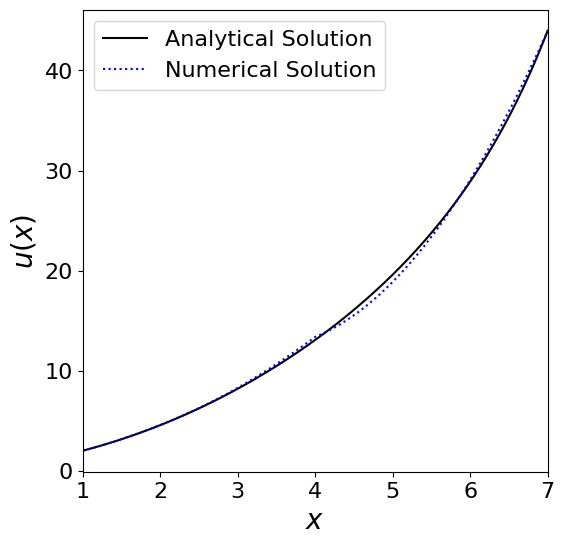

In [ ]:
# Plot
u_func = sp.lambdify(x, u)
x_vals = np.linspace(1, 7, 1000)
y_vals = -12 * np.exp(-6) + 12 * np.exp(x_vals - 7) + 0.5 * (1 + x_vals) ** 2
z_vals = u_func(x_vals)

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, color='black', label='Analytical Solution')
plt.plot(x_vals, z_vals, linestyle='dotted', color='blue', label='Numerical Solution')
plt.xlim(1, 7)
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')
plt.legend()
plt.show()

In [ ]:
# Create lambda functions for faster evaluation
functions = [
    sp.lambdify(x, N11), sp.lambdify(x, N21), sp.lambdify(x, N31),
    sp.lambdify(x, N12), sp.lambdify(x, N22), sp.lambdify(x, N32),
    sp.lambdify(x, N13), sp.lambdify(x, N23), sp.lambdify(x, N33)
]

# Create plot
plt.figure(figsize=(12, 6))
x_vals = np.linspace(1, 7, 1000)

for i, func in enumerate(functions):
    y_vals = [func(xi) for xi in x_vals]
    plt.plot(x_vals, y_vals, label=f'N{(i%3)+1}{(i//3)+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Basis Functions (P2 elements) over [1, 7]')
plt.legend()
plt.grid(True)
plt.show()

# Create separate plots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Derivatives of Lagrange Basis Functions (P2 elements)', fontsize=16)

d_functions = [
    sp.lambdify(x, dN11), sp.lambdify(x, dN21), sp.lambdify(x, dN31),
    sp.lambdify(x, dN12), sp.lambdify(x, dN22), sp.lambdify(x, dN32),
    sp.lambdify(x, dN13), sp.lambdify(x, dN23), sp.lambdify(x, dN33)
]

for i, func in enumerate(d_functions):
    row = i // 3
    col = i % 3

    x_vals = np.linspace(1, 7, 1000)
    y_vals = [func(xi) for xi in x_vals]

    axs[row, col].plot(x_vals, y_vals)
    axs[row, col].set_title(f'dN{(i//3)+1}{(i%3)+1}')
    axs[row, col].grid(True)
    axs[row, col].set_xlim(1, 7)

    # Set y-axis limits based on the function values
    y_min, y_max = min(y_vals), max(y_vals)
    y_range = y_max - y_min
    axs[row, col].set_ylim(y_min - 0.1*y_range, y_max + 0.1*y_range)

    if row == 2:  # Only set xlabel for bottom row
        axs[row, col].set_xlabel('x')
    if col == 0:  # Only set ylabel for left column
        axs[row, col].set_ylabel('dy/dx')

plt.tight_layout()
plt.show()